In [404]:
#Importing dependencies
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import difflib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [405]:
#loading into pandas dataframe from csv
netflix_dataset = pd.read_csv('/content/netflix_data.csv.zip')

In [406]:
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [407]:
netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [408]:
#checking null values
netflix_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [409]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [410]:
#filling null values with string
netflix_dataset.fillna('',inplace = True)

In [411]:
#checking missing values
netflix_dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [412]:
netflix_dataset.describe(include='all').T #This is used to transpose the result, swapping rows and columns.
#This can make the output easier to read, especially when dealing with a large number of columns.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1768,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
netflix_dataset.shape

(8807, 12)

In [414]:
# type of movies in netflix
movie_type_counts = netflix_dataset['type'].value_counts()
print(movie_type_counts)

Movie      6131
TV Show    2676
Name: type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

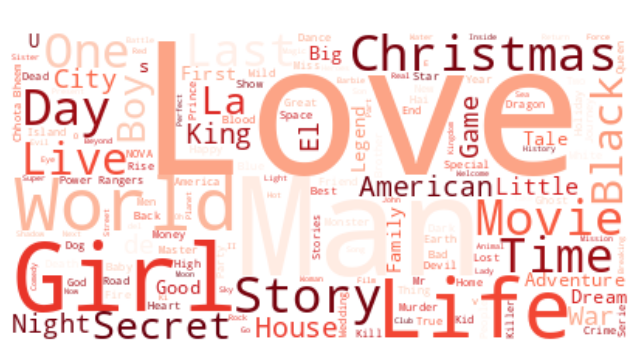

In [415]:
#creating word cloud for movie title

titles = netflix_dataset['title'].values
text =' '.join(titles)

wordcloud =  WordCloud(background_color ='white', colormap ='Reds').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.title('Most Common words in Netflix Titles', color='white')
plt.show


In [416]:
#selecting the relevant features for recommendation
netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [417]:
selected_features =['title','type','director','cast','rating','listed_in','description']

In [418]:
netflix_dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [419]:
#combining all selected features
combined_features = netflix_dataset['title']+' '+netflix_dataset['type']+' '+netflix_dataset['director']+' '+netflix_dataset['cast']+' '+netflix_dataset['rating']+' '+netflix_dataset['listed_in']+' '+netflix_dataset['description']

In [420]:
print(combined_features)

0       Dick Johnson Is Dead Movie Kirsten Johnson  PG...
1       Blood & Water TV Show  Ama Qamata, Khosi Ngema...
2       Ganglands TV Show Julien Leclercq Sami Bouajil...
3       Jailbirds New Orleans TV Show   TV-MA Docuseri...
4       Kota Factory TV Show  Mayur More, Jitendra Kum...
                              ...                        
8802    Zodiac Movie David Fincher Mark Ruffalo, Jake ...
8803    Zombie Dumb TV Show   TV-Y7 Kids' TV, Korean T...
8804    Zombieland Movie Ruben Fleischer Jesse Eisenbe...
8805    Zoom Movie Peter Hewitt Tim Allen, Courteney C...
8806    Zubaan Movie Mozez Singh Vicky Kaushal, Sarah-...
Length: 8807, dtype: object


In [421]:
#converting the text data to feature vectors/numerical data
vectorizer =TfidfVectorizer()

In [422]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [423]:
print(feature_vectors)

  (0, 22107)	0.25344436384086816
  (0, 15546)	0.14962408193184756
  (0, 6586)	0.15657805917884193
  (0, 47384)	0.1224348530255182
  (0, 20365)	0.12363537950715589
  (0, 47838)	0.04414635398679604
  (0, 50935)	0.1703872916298364
  (0, 9959)	0.2338919887242548
  (0, 2303)	0.04356081313736832
  (0, 22449)	0.2338919887242548
  (0, 21961)	0.05110936057449531
  (0, 11674)	0.13387225926877047
  (0, 44880)	0.20999131356257922
  (0, 16265)	0.17243969583499147
  (0, 27340)	0.09270856271499223
  (0, 20805)	0.12715006752871133
  (0, 33978)	0.04720239732066069
  (0, 14652)	0.16227232275647527
  (0, 47355)	0.07721598828744815
  (0, 32798)	0.2295436886791926
  (0, 15871)	0.12172068539601223
  (0, 20463)	0.07769422904014017
  (0, 3252)	0.08529564198024457
  (0, 13059)	0.09344294107447243
  (0, 20)	0.10835279585551272
  :	:
  (8806, 529)	0.095131450648876
  (8806, 6700)	0.10854355265399496
  (8806, 51196)	0.09433725460114324
  (8806, 8858)	0.16127641871847298
  (8806, 32079)	0.09451808570996922
  (8806

Cosine Similarity

In [424]:
similarity = cosine_similarity(feature_vectors)

In [425]:
print(similarity)

[[1.00000000e+00 8.79620408e-03 1.75658081e-02 ... 9.00333992e-03
  1.74868623e-02 2.64847190e-02]
 [8.79620408e-03 1.00000000e+00 2.09960759e-02 ... 9.74886226e-04
  0.00000000e+00 5.25804061e-03]
 [1.75658081e-02 2.09960759e-02 1.00000000e+00 ... 5.13991940e-03
  9.71931845e-03 3.25391248e-02]
 ...
 [9.00333992e-03 9.74886226e-04 5.13991940e-03 ... 1.00000000e+00
  5.39915785e-02 5.58679152e-03]
 [1.74868623e-02 0.00000000e+00 9.71931845e-03 ... 5.39915785e-02
  1.00000000e+00 9.68450408e-03]
 [2.64847190e-02 5.25804061e-03 3.25391248e-02 ... 5.58679152e-03
  9.68450408e-03 1.00000000e+00]]


In [426]:
print(similarity.shape)

(8807, 8807)


In [427]:
#getting the movie name from the user
movie_name = input('Enter your favorite movie name: ')

Enter your favorite movie name: friends


In [428]:
#creating a list with all the movie names given in the dataset(for this we will use title column)
list_of_all_titles = netflix_dataset['title'].tolist()
print(list_of_all_titles)

['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Dragon', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws 3', 'Jaws: The Revenge

In [429]:
#finding a close match for movie name given by user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
find_close_match

['Friends', 'Girlfriends', 'Unfriended']

In [430]:
close_match = find_close_match[0]
print(close_match)

Friends


In [431]:
#finding the index of the movie with title
index_of_the_movie = netflix_dataset[netflix_dataset.title == close_match]['show_id'].values[0]

In [432]:
print(index_of_the_movie)

s6807


In [433]:
#check for duplicate indices
duplicate_indices = netflix_dataset.show_id.duplicated()
print(duplicate_indices)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: show_id, Length: 8807, dtype: bool


In [434]:
print(netflix_dataset.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [435]:
#removing string from the indices
netflix_dataset['show_id'] = netflix_dataset['show_id'].str.replace('[^0-9]', '', regex=True)
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [436]:
index_of_the_movie =  netflix_dataset[netflix_dataset.title == close_match]['show_id'].values[0]
index_of_the_movie = int(index_of_the_movie)
print(index_of_the_movie)

6807


In [437]:
#getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0474973715088018), (1, 0.019299095585661015), (2, 0.02973036713567738), (3, 0.005042618660185806), (4, 0.025187525189492122), (5, 0.01696151872626588), (6, 0.025957744896178542), (7, 0.041363655725411064), (8, 0.016141187913726117), (9, 0.03295648194891217), (10, 0.01642287114237837), (11, 0.013900598332716937), (12, 0.027510304907243856), (13, 0.03697332870182601), (14, 0.011601724484394619), (15, 0.02216666383191801), (16, 0.030691147404634214), (17, 0.0398688290417241), (18, 0.038896156896841165), (19, 0.023653354149287074), (20, 0.021978222525960673), (21, 0.015393805524443445), (22, 0.03983061540937316), (23, 0.037658059002192906), (24, 0.04930829134018517), (25, 0.01382325253618303), (26, 0.03976058821793113), (27, 0.01332386542415832), (28, 0.03323050260523892), (29, 0.010848229893939233), (30, 0.01989972505782851), (31, 0.018913033315425834), (32, 0.019136168855130357), (33, 0.020872500916775345), (34, 0.02750682490207682), (35, 0.023520568972637056), (36, 0.036705911840

In [438]:
len(similarity_score)

8807

In [439]:
#sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse= True)
print(sorted_similar_movies)

[(6807, 1.0000000000000002), (7947, 0.19546671346745395), (427, 0.18736425288888178), (4023, 0.16629067397075192), (2247, 0.15034345161205928), (1229, 0.14525033288978784), (2510, 0.14123338741846725), (2623, 0.14098635017785902), (7219, 0.13816637931159564), (2438, 0.13190461979308404), (2253, 0.13162451369593217), (2633, 0.13056316542886712), (1272, 0.13043076379288063), (7487, 0.12918701233988858), (1598, 0.1271567597743197), (3159, 0.1241226388231025), (2630, 0.12378559061862231), (1823, 0.12003538644392049), (6877, 0.11741351473542828), (991, 0.11734108441003883), (6740, 0.11524912537337127), (6914, 0.11401224980729967), (4057, 0.11240080199502334), (4030, 0.11166945351661874), (213, 0.11022172391793537), (4297, 0.1100998197898644), (5649, 0.1099467935270913), (1726, 0.10981513408385506), (2425, 0.10882589122666576), (413, 0.1034298004718296), (1956, 0.10248559523054356), (7522, 0.10111145542300673), (8192, 0.10107646270433496), (6183, 0.10048376913305278), (2365, 0.09988194353037

In [442]:
#print the name of the similar movies based on the index
print('Movies suggested for you: \n')
i = 1

for movie in sorted_similar_movies:
  index =  movie[0]
  title_from_index = netflix_dataset[netflix_dataset.index== index]['title'].values[0]
  if(i<11):
    print(i,'.', title_from_index)
    i+=1

Movies suggested for you: 

1 . From Japan to Egypt
2 . Savage Raghda
3 . Wannabe Courageous
4 . The Land of Hypocrisy
5 . Mama's Boy
6 . My Way
7 . The Beach Loafer
8 . We'll Be Right Back After The Break
9 . Know Your Enemy - Japan
10 . Sorry To Disturb
